# Relax Challenge : Take Home Challenge

#### Defining   an    "adopted   user"   as   a   user   who has   logged   into   the   product   on   three   separate days   in   at   least   one   seven­day   period ,   identify   which   factors   predict   future   user adoption.

In [170]:
#import packages
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVC
from sklearn.exceptions import NotFittedError


In [134]:
takehome_users = pd.read_csv("takehome_users.csv", parse_dates=["creation_time", "last_session_creation_time"], encoding="cp1252'")

In [135]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [136]:
takehome_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1378448055,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1358274517,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1398602716,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1338638159,0,0,6,NaN


In [137]:
takehome_engagement= pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [138]:
takehome_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [139]:
takehome_engagement.info

<bound method DataFrame.info of                 time_stamp  user_id  visited
0      2014-04-22 03:53:30        1        1
1      2013-11-15 03:45:04        2        1
2      2013-11-29 03:45:04        2        1
3      2013-12-09 03:45:04        2        1
4      2013-12-25 03:45:04        2        1
...                    ...      ...      ...
207912 2013-09-06 06:14:15    11996        1
207913 2013-01-15 18:28:37    11997        1
207914 2014-04-27 12:45:16    11998        1
207915 2012-06-02 11:55:59    11999        1
207916 2014-01-26 08:57:12    12000        1

[207917 rows x 3 columns]>

In [140]:
takehome_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [141]:
# Last session creation time has 3177 missing values and invited by user id has 5583 missing values

In [142]:
takehome_users['last_session_creation_time'] = takehome_users['last_session_creation_time'].fillna(0)
takehome_users['invited_by_user_id'] = takehome_users['invited_by_user_id'].fillna(0)

In [143]:
takehome_users.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

### Determine an adoptive user: One factor that can determine if the user is an adpotive user is by looking at how many times they have logged into the product on three separate days in at least one seven-day period. We will use these fctors to make a column called adopotive user and build a predicitve classification model.

#### 1. How many vistors do we have?

In [144]:
user_vists = takehome_engagement.groupby(['user_id'])['visited'].sum()

In [145]:
user_vists

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: visited, Length: 8823, dtype: int64

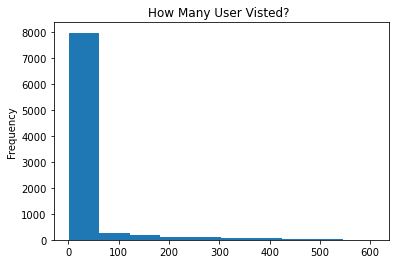

In [146]:
# Lets vizualize
user_vists.plot(kind="hist",title= "How Many User Visted? ")

#### 2.This tells use that we have 8823 vistors. Now lets figure our how many of these vistors logged on three times to use their product.

In [179]:
loginthreetime = takehome_engagement.groupby('user_id').filter(lambda x:len(x) >=3)
print((len(loginthreetime['user_id'].unique())))

2248


In [148]:
loginthreetime

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


#### Now we know that we have 2248 users that logged in for three times, now let use see how many of these users logdged on within the seven day time period. That will determine if they will be a future doptive user.

In [149]:
loginthreetime.reset_index(drop=True, inplace = True)

In [150]:
loginthreetime

,time_stamp,user_id,visited
0,2013-11-15 03:45:04,2,1
1,2013-11-29 03:45:04,2,1
2,2013-12-09 03:45:04,2,1
3,2013-12-25 03:45:04,2,1
4,2013-12-31 03:45:04,2,1
...,...,...,...
200997,2014-04-20 14:22:45,11991,1
200998,2014-04-25 14:22:45,11991,1
200999,2014-04-28 14:22:45,11991,1
201000,2014-05-17 14:22:45,11991,1


In [152]:
adopted_users = []
for i in range(len(loginthreetime)-2):
    user = loginthreetime['user_id'][i]
    if user != adopted and user == loginthreetime['user_id'][i+2]: 
        starttime = pd.Timestamp(loginthreetime['time_stamp'][i])
        endtime = starttime + pd.Timedelta('7D')
            adopted_users.append(user)
            adopted = user

In [153]:
len(adopted_users)


1602

In [154]:
 adopted_users 

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 347,
 351,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 591,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1214,
 1222,
 1233,
 1235,
 1238,


#### Since we are trying to figure out whether the user will be an adopted user or not it would be great to use a binary classification model. So we can use Logistic Resgression Model to help predict whether the user will be an adopted user or not. 

In [155]:
takehome_users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [156]:
new_frame = takehome_users.iloc[:1602]

In [157]:
new_frame

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
1597,1598,2013-04-18 11:13:41,Gerber Jana,JanaGerber@jourrapide.com,ORG_INVITE,1390216421,1,0,332,1280.0
1598,1599,2014-02-26 07:40:41,Brennan Brayden,BraydenBrennan@gmail.com,ORG_INVITE,1393918841,1,0,197,4320.0
1599,1600,2012-07-03 05:39:42,Toosey Blake,BlakeToosey@cuvox.de,PERSONAL_PROJECTS,1345441182,0,1,175,0.0
1600,1601,2014-02-12 23:12:01,McLaughlin Kathleen,KathleenJMcLaughlin@yahoo.com,ORG_INVITE,1392246721,0,0,32,47.0


In [158]:
new_frame.insert(loc= 3,
          column='adopted_user',
          value=adopted_users )

In [159]:
new_frame

,object_id,creation_time,name,adopted_user,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,2,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,10,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,20,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,33,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,42,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...,...
1597,1598,2013-04-18 11:13:41,Gerber Jana,11965,JanaGerber@jourrapide.com,ORG_INVITE,1390216421,1,0,332,1280.0
1598,1599,2014-02-26 07:40:41,Brennan Brayden,11967,BraydenBrennan@gmail.com,ORG_INVITE,1393918841,1,0,197,4320.0
1599,1600,2012-07-03 05:39:42,Toosey Blake,11969,BlakeToosey@cuvox.de,PERSONAL_PROJECTS,1345441182,0,1,175,0.0
1600,1601,2014-02-12 23:12:01,McLaughlin Kathleen,11975,KathleenJMcLaughlin@yahoo.com,ORG_INVITE,1392246721,0,0,32,47.0


In [173]:
X = new_frame.drop(columns = 'adopted_user')
Y= new_frame['adopted_user']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [174]:
X

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
1597,1598,2013-04-18 11:13:41,Gerber Jana,JanaGerber@jourrapide.com,ORG_INVITE,1390216421,1,0,332,1280.0
1598,1599,2014-02-26 07:40:41,Brennan Brayden,BraydenBrennan@gmail.com,ORG_INVITE,1393918841,1,0,197,4320.0
1599,1600,2012-07-03 05:39:42,Toosey Blake,BlakeToosey@cuvox.de,PERSONAL_PROJECTS,1345441182,0,1,175,0.0
1600,1601,2014-02-12 23:12:01,McLaughlin Kathleen,KathleenJMcLaughlin@yahoo.com,ORG_INVITE,1392246721,0,0,32,47.0


In [175]:
Y

0           2
1          10
2          20
3          33
4          42
        ...  
1597    11965
1598    11967
1599    11969
1600    11975
1601    11988
Name: adopted_user, Length: 1602, dtype: int64

In [176]:
regressor = RandomForestRegressor(n_estimators = 15)

In [177]:
regressor.fit(X_train,Y_train)


TypeError: invalid type promotion

In [172]:
predictions = regressor.predict(X_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Write Up:
 
### When working on the Relax take home challenge. The goal of the project was to define what an "adopted user" as a user who has logged into the product on three   separate days  in  at  least  one  seven­day period,  identify which factors predict future user adoption. The first step I took during this project was to load our two datasets. The two datasets for this project is takehome users and takehome engagement. One factor that can determine if the user is an adpotive user is by looking at how many times they have logged into the product on three separate days in at least one seven-day period. So I caluclated how many times the users logged on to use the product. Then, we found out that 2248 users that logged in for three times, then the next thing to do was to see how many of these users logged on within the seven day time period. That will determine if they will be a future doptive user. To complete this I made a for loop to calculte from the time they logged on until the time they logged on within a seven day period. Which formed a new column I named adoptive user. I went on to use the random forrest model to. 


In [ ]:
}